In [37]:
import pandas as pd
df = pd.read_csv("precisceno_Ad1_za_analizo.csv")
df.head()

,spol,spol_starša,izob_matere,izob_očeta,število,izpolnjeval,vključen,status_matere,status_očeta,jezik,...,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,0,1,3,3,5.0,0,da,3,3,8,...,2.000000,2.000,2.000000,2.0,2.000,2.00,0.50,1.500000,2.0,2.000000
1,0,1,1,1,4.0,1,da,3,3,7,...,1.000000,1.000,1.000000,1.0,1.000,1.00,1.00,1.000000,1.0,1.000000
2,0,1,2,2,3.0,0,da,3,3,7,...,2.000000,1.750,1.857143,2.0,1.875,2.00,1.25,1.666667,2.0,1.833333
3,0,1,2,1,4.0,1,da,3,3,7,...,1.142857,0.250,0.142857,0.4,1.000,1.00,0.50,1.000000,2.0,1.583333
4,1,1,2,1,4.0,1,da,3,3,7,...,1.928571,1.125,1.428571,1.0,1.625,1.75,1.00,0.166667,1.0,0.833333


In [38]:
column_names = df.columns.tolist()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
#print(column_names)
#opp_value_counts = df['OPP'].value_counts(dropna=False)
#print(opp_value_counts)
selected_columns = ['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19']
df[selected_columns] = scaler.fit_transform(df[selected_columns])


# Generate the dataset description
description = df[selected_columns].describe()
description = description.drop('count')

# Round the statistics to two decimals
description = description.round(2)

# Output the description to a CSV file
description.to_csv('column_description_mnenja.csv')

In [39]:
# New column names in order
new_column_names = ["Child_gender", "Parent_gender", "Maternal_edu","Father_edu","Number","Order","Included","Maternal_status","Father_status","Language","OPP","Other",'age_in_months', 'starost_vkljucitev', 'SoD1', 'SED', 'MoD', 'ArD', 'LaD', 'SoD2', 'ScD', 'MaD', 'GeE', 'EdR']

# Change column names
df.columns = new_column_names

C:\Users\borbr\AppData\Local\Temp\ipykernel_7572\2977941347.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


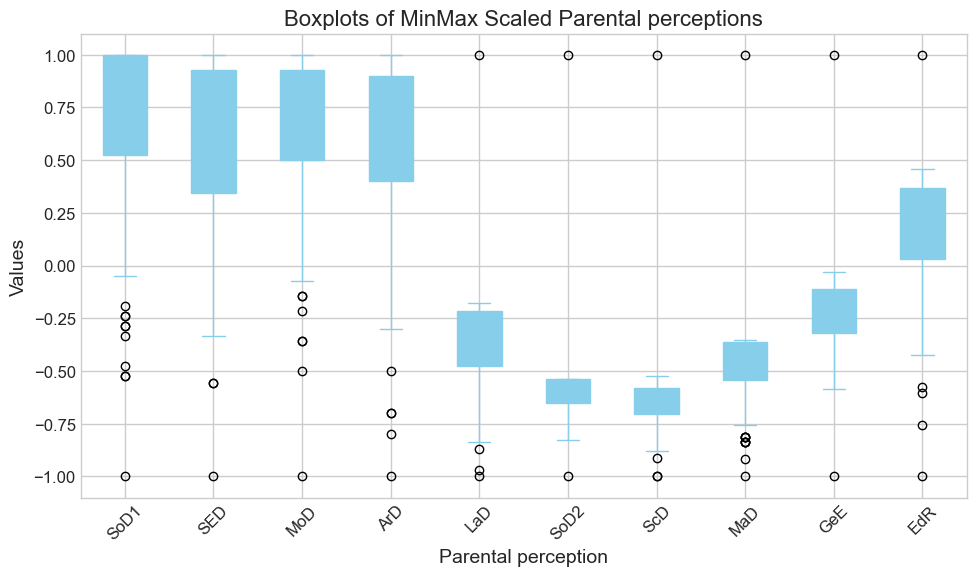

In [40]:
import matplotlib.pyplot as plt
selected_columns= ['SoD1', 'SED', 'MoD', 'ArD', 'LaD', 'SoD2', 'ScD', 'MaD', 'GeE', 'EdR']

data_for_boxplot = df[selected_columns]

# Set up plot style
plt.style.use('seaborn-whitegrid')

# Plot boxplots
data_for_boxplot.boxplot(figsize=(10, 6), color='skyblue', patch_artist=True)
plt.title('Boxplots of MinMax Scaled Parental perceptions', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Parental perception', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability if necessary
plt.yticks(fontsize=12)  # Set font size for y-axis ticks
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

stevilo = st. druzinskih clanov

izpolnjeval = kateri otrok po vrsti (prvorojenec, ...)

vkljucen = vklj. v vrtec... kasneje desno stolpec tudi v mesecih koliko casa

status = brezposelen....

OPP = posebne potrebe

In [41]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')


V tem df imamo seveda vključene same NaN, saj so izpolnjevali V10-...

In [42]:
df = df.drop(columns=['Included'])
df = df.drop(columns=['Other'])#dropamo se drugo
df = df.drop(columns=['OPP'])
df.head()

,Child_gender,Parent_gender,Maternal_edu,Father_edu,Number,Order,Maternal_status,Father_status,Language,age_in_months,...,SoD1,SED,MoD,ArD,LaD,SoD2,ScD,MaD,GeE,EdR
0,0,1,3,3,5.0,0,3,3,8,85.0,...,1.000000,1.000000,1.000000,1.0,-0.213115,-0.536232,-0.701493,-0.432432,-0.111111,0.457426
1,0,1,1,1,4.0,1,3,3,7,80.0,...,0.333333,0.407407,0.500000,0.5,-0.475410,-0.652174,-0.641791,-0.513514,-0.333333,0.093069
2,0,1,2,2,3.0,0,3,3,7,84.0,...,1.000000,0.851852,0.928571,1.0,-0.245902,-0.536232,-0.611940,-0.405405,-0.111111,0.396700
3,0,1,2,1,4.0,1,3,3,7,77.0,...,0.428571,-0.037037,0.071429,0.2,-0.475410,-0.652174,-0.701493,-0.513514,-0.111111,0.305611
4,1,1,2,1,4.0,1,3,3,7,80.0,...,0.952381,0.481481,0.714286,0.5,-0.311475,-0.565217,-0.641791,-0.648649,-0.333333,0.032343


In [43]:
num_rows = df.shape[0]
print(f"Number of rows in the dataframe: {num_rows}")

Number of rows in the dataframe: 519


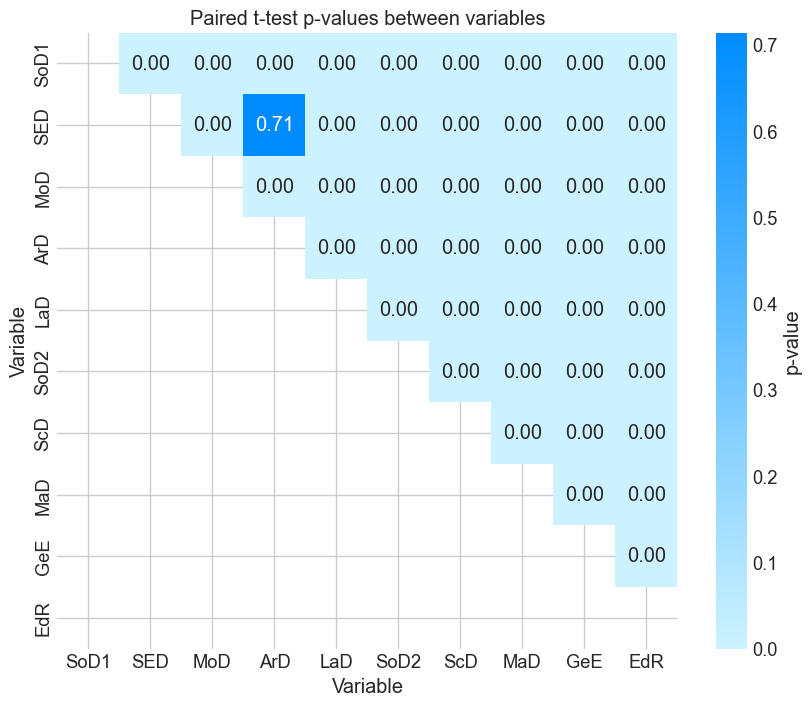

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_rel
from matplotlib.colors import LinearSegmentedColormap

# Sample DataFrame
# Assuming df is already defined as per your data
output_variables = ['SoD1', 'SED', 'MoD', 'ArD', 'LaD', 'SoD2', 'ScD', 'MaD', 'GeE', 'EdR']

# Create a DataFrame to store the p-values
p_values_df = pd.DataFrame(index=output_variables, columns=output_variables)

# Loop through all pairs of variables and perform paired t-tests
for var1 in output_variables:
    for var2 in output_variables:
        if var1 != var2:
            t_stat, p_value = ttest_rel(df[var1], df[var2])
            p_values_df.loc[var1, var2] = p_value

# Convert p-values to numeric
p_values_df = p_values_df.astype(float)

# Create a mask for the lower triangle
mask = np.tril(np.ones_like(p_values_df, dtype=bool))

# Define a custom colormap with shades of sky blue
colors = [(0.8, 0.95, 1), (0.6, 0.85, 1), (0.4, 0.75, 1), (0.2, 0.65, 1), (0, 0.55, 1)]
cmap = LinearSegmentedColormap.from_list('skyblue', colors)

# Create a heatmap to visualize the p-values
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_df, mask=mask, annot=True, cmap=cmap, fmt=".2f", cbar_kws={'label': 'p-value'})
plt.title('Paired t-test p-values between variables')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.show()


Average importance of Number: 0.20
Average importance of Maternal_status: 0.15
Average importance of Maternal_edu: 0.14
Average importance of Father_edu: 0.12
Average importance of Order: 0.12
Average importance of Language: 0.10
Average importance of Child_gender: 0.09
Average importance of Parent_gender: 0.05
Average importance of Father_status: 0.04


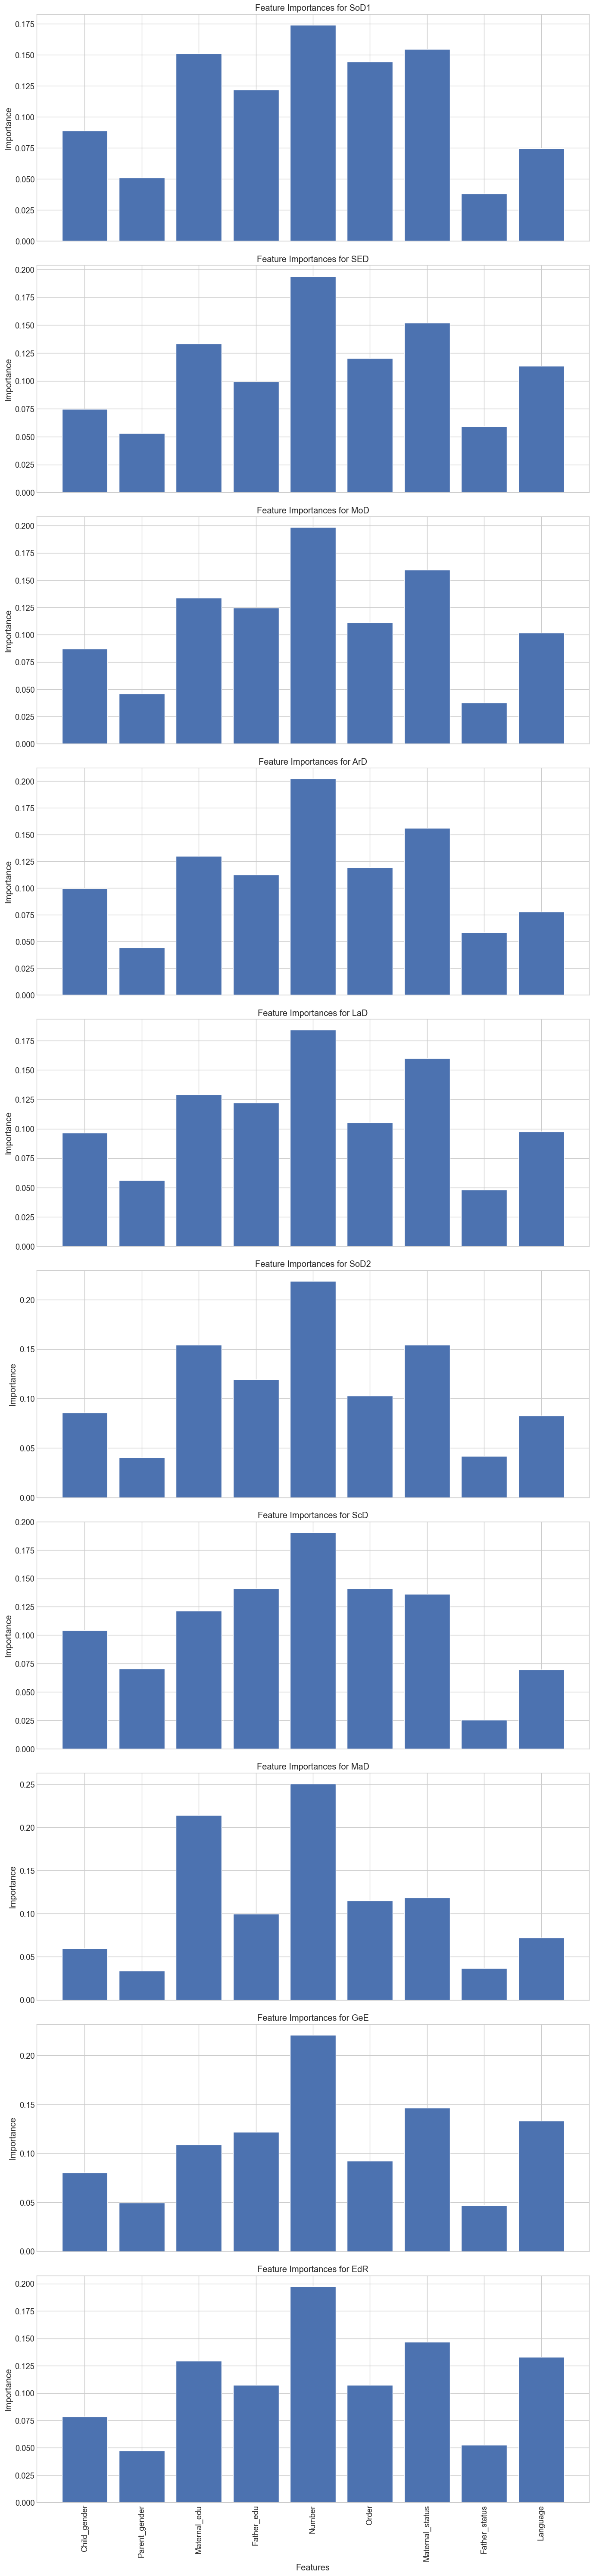

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Dictionary to store feature importance for each output variable
feature_importance_dict = {}

categorical_features = ['Child_gender', 'Parent_gender', "Language"]
ordinal_features = ['Maternal_edu', 'Father_edu', 'Number', 'Order', 'Maternal_status', 'Father_status',]
continuous_features = ['age_in_months', 'starost_vkljucitev']

output_variables = ['SoD1', 'SED', 'MoD', 'ArD', 'LaD', 'SoD2', 'ScD', 'MaD', 'GeE', 'EdR']

X = df.drop(output_variables, axis=1)  # Features
X = X.drop(continuous_features, axis=1)  # Features                    TOLE JE TESTNO CE IZKLJUCIMO

# Standardize continuous features
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# Convert categorical features into dummy variables
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

for output_variable in output_variables:
    y = df[output_variable]  # Target variable
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Feature importance
    feature_importance = rf_model.feature_importances_
    feature_importance_dict[output_variable] = feature_importance

average_importance = {}
for feature in X.columns:
    feature_importance_sum = 0
    for output_variable in output_variables:
        feature_importance_sum += feature_importance_dict[output_variable][X.columns.get_loc(feature)]
    average_importance[feature] = feature_importance_sum / len(output_variables)

# Sort the average importance dictionary by value
average_importance_sorted = dict(sorted(average_importance.items(), key=lambda item: item[1], reverse=True))

# Print average importance for each feature
for feature, importance in average_importance_sorted.items():
    print(f'Average importance of {feature}: {importance:.2f}')

# Plotting feature importances for each output variable
num_features = X.shape[1]
fig, axes = plt.subplots(len(output_variables), 1, figsize=(14, 6*len(output_variables)), sharex=True)
for i, output_variable in enumerate(output_variables):
    ax = axes[i]
    ax.bar(range(num_features), feature_importance_dict[output_variable], align='center')
    ax.set_title(f'Feature Importances for {output_variable}')
    ax.set_ylabel('Importance')
    ax.set_xticks(range(num_features))
    ax.set_xticklabels(X.columns, rotation=90)
    ax.grid(True)

plt.xlabel('Features')
plt.tight_layout()
plt.show()


In [46]:
from scipy import stats as stats
# Initialize empty DataFrame for results
correlation_table = pd.DataFrame(index=categorical_features, columns=ordinal_features)

# Calculate Kendall's tau for ordinal-ordinal variables
for feature in ordinal_features:
    kendall_tau_results = []
    for feature2 in ordinal_features:
        kendall_tau, _ = stats.kendalltau(X[feature], X[feature2])
        kendall_tau_results.append(kendall_tau)
    correlation_table.loc['Kendall Tau', feature] = kendall_tau_results

# Calculate Cramér's V for categorical-categorical variables
for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:
            confusion_matrix = pd.crosstab(X[feature1], X[feature2])
            chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
            n = confusion_matrix.sum().sum()
            phi2 = chi2 / n
            r, k = confusion_matrix.shape
            cramers_v = np.sqrt(phi2 / min((r - 1), (k - 1)))
            correlation_table.loc['Cramer V', (feature1, feature2)] = cramers_v

# Calculate Spearman's rank-biserial correlation for categorical-ordinal variables (more than binary categories)
for categorical_feature in categorical_features:
    for ordinal_feature in ordinal_features:
        spearman_biserial, _ = stats.pointbiserialr(X[categorical_feature], X[ordinal_feature])
        correlation_table.loc['Spearman Rank-Biserial', (categorical_feature, ordinal_feature)] = spearman_biserial

# Display the correlation table
print(correlation_table)

                                                             Maternal_edu  \
Child_gender                                                          NaN   
Parent_gender                                                         NaN   
Language                                                              NaN   
Kendall Tau             [1.0, 0.4456131905716623, 0.012548599782176106...   
Cramer V                                                              NaN   
Spearman Rank-Biserial                                           0.386642   

                                                               Father_edu  \
Child_gender                                                          NaN   
Parent_gender                                                         NaN   
Language                                                              NaN   
Kendall Tau             [0.44561319057166227, 1.0, 0.03329775539457974...   
Cramer V                                                              NaN  

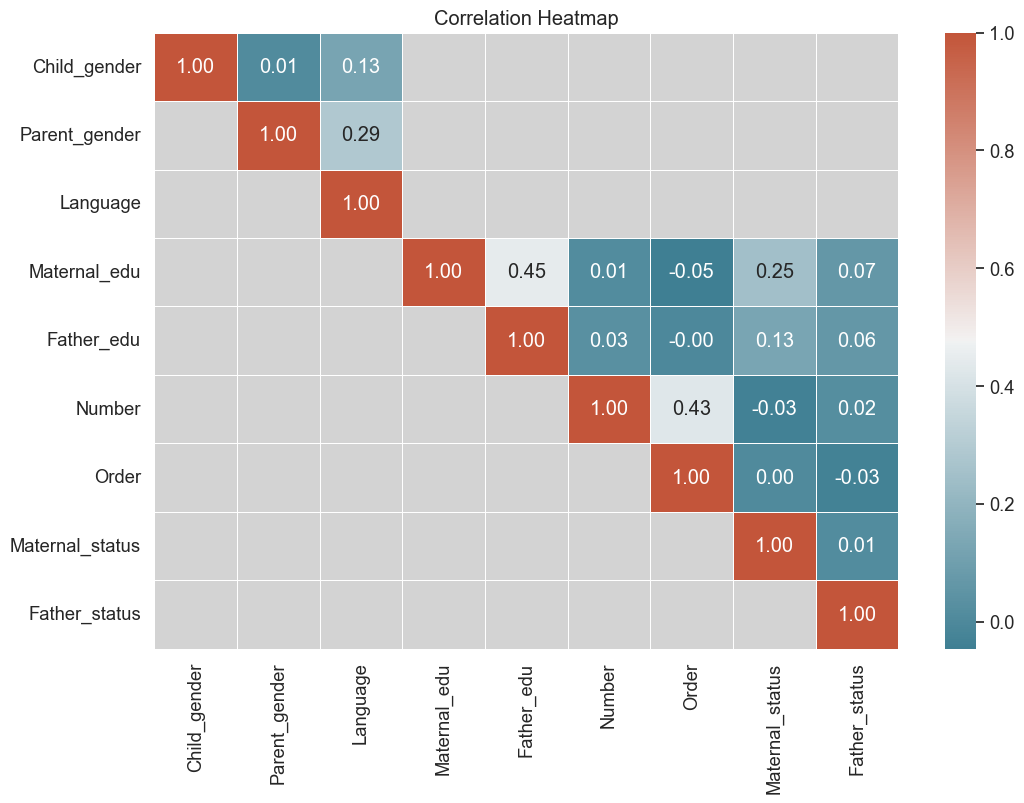

In [47]:
correlation_table = pd.DataFrame(index=categorical_features + ordinal_features, columns=categorical_features + ordinal_features)

# Calculate Kendall's tau for ordinal-ordinal variables
for feature1 in ordinal_features:
    for feature2 in ordinal_features:
        kendall_tau, _ = stats.kendalltau(X[feature1], X[feature2])
        correlation_table.loc[feature1, feature2] = kendall_tau

# Calculate Cramér's V for categorical-categorical variables
for feature1 in categorical_features:
    for feature2 in categorical_features:
        confusion_matrix = pd.crosstab(X[feature1], X[feature2])
        chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        cramers_v = np.sqrt(phi2 / min((r - 1), (k - 1)))
        correlation_table.loc[feature1, feature2] = cramers_v

# Set diagonal elements to 1
np.fill_diagonal(correlation_table.values, 1)

# Create a mask to hide the lower triangle
mask = np.tri(correlation_table.shape[0], k=-1)

# Set the color for categorical-ordinal pairs to gray
for categorical_feature in categorical_features:
    for ordinal_feature in ordinal_features:
        correlation_table.loc[categorical_feature, ordinal_feature] = np.nan

# Set the style of the heatmap
sns.set(font_scale=1.2)

# Create a custom colormap with gray for NaN values
cmap = sns.diverging_palette(220, 20, as_cmap=True)
cmap.set_bad('lightgray')

# Create a heatmap with the masked lower triangle
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_table.astype(float), annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, mask=mask)
heatmap.set_title('Correlation Heatmap')
plt.show()

In [48]:
print(X.columns)


Index(['Child_gender', 'Parent_gender', 'Maternal_edu', 'Father_edu', 'Number',
       'Order', 'Maternal_status', 'Father_status', 'Language'],
      dtype='object')


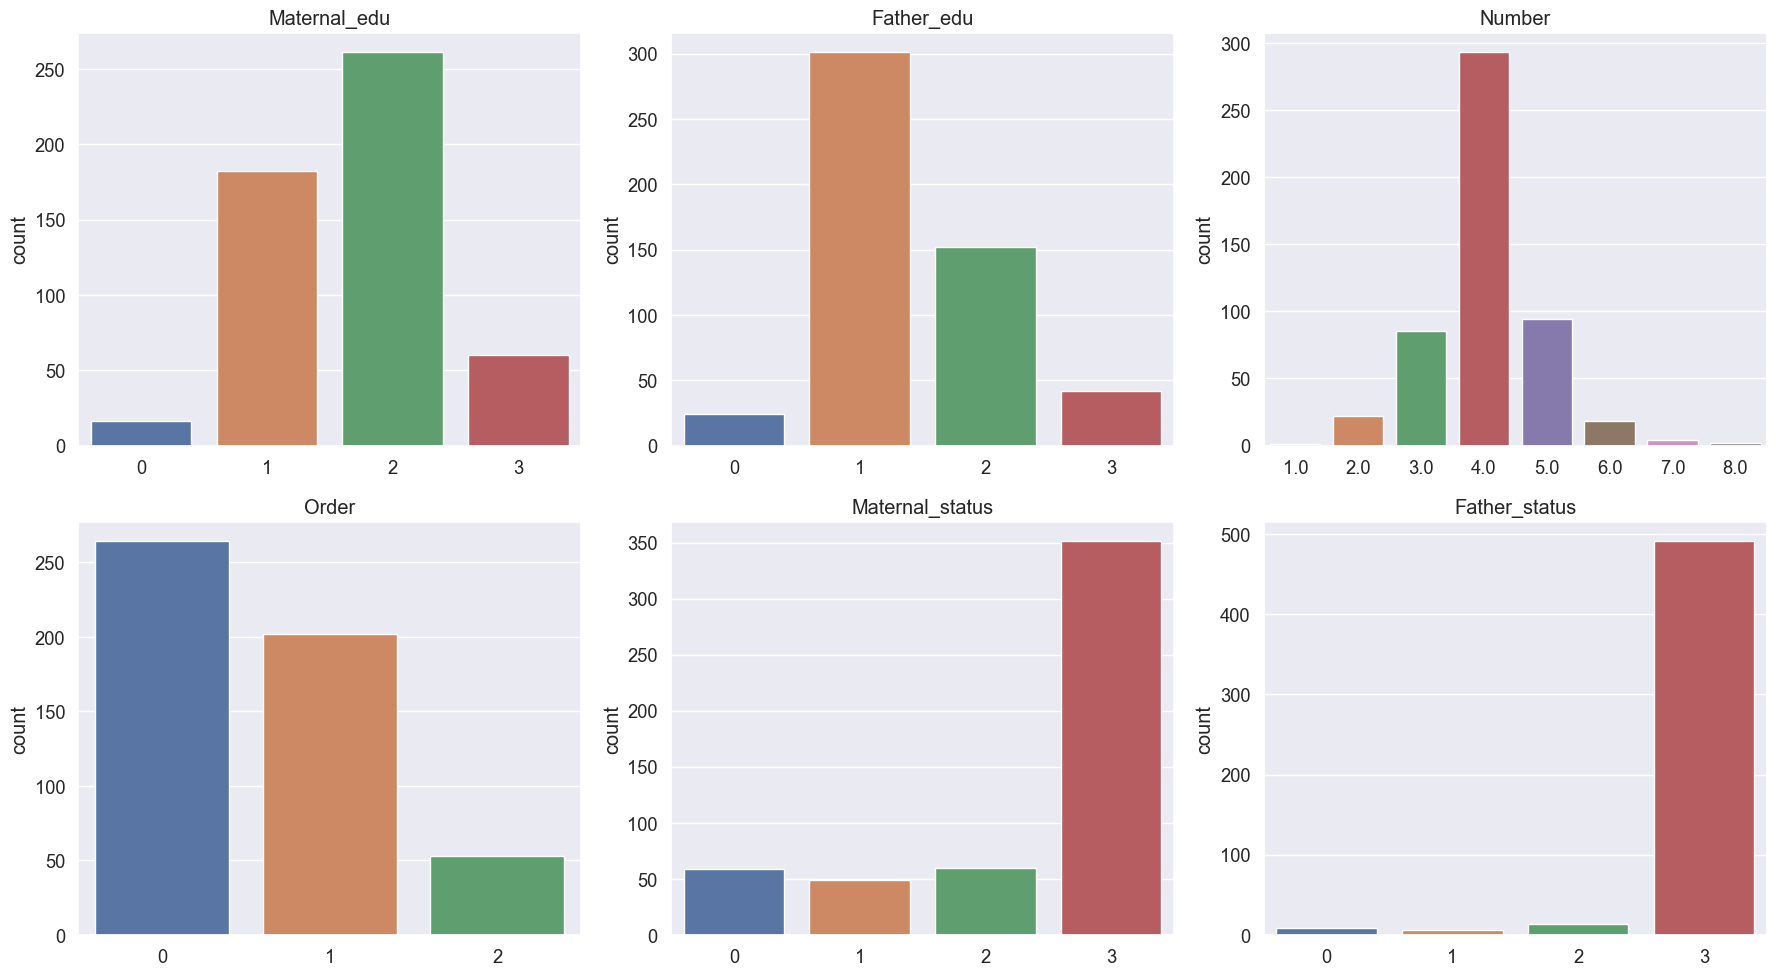

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reverse mapping dictionaries
language_mapping = {'Albanščina': 0, 'Bolgarski': 1, 'Bosanščina': 2, 'FRANCOSKI': 3, 'ITALIJANŠČINA': 4, 'Makedonščina': 5, 'Romski': 6, 'Slovenščina': 7, 'Srb-hr': 8, 'Ukr-Rus': 9}
gender_mapping = {0: 'Male', 1: 'Female'}
parent_gender_mapping = {0: 'Male', 1: 'Female'}

"""
plt.figure(figsize=(18, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=X)
    plt.title(f'Count plot of {feature}')
plt.tight_layout()
plt.show()
"""
# Visualization of ordinal features
plt.figure(figsize=(18, 10))
for i, feature in enumerate(ordinal_features, 1):
    plt.subplot(2, 3, i)
    unique_values = sorted(X[feature].unique())  # Sort unique values
    sns.countplot(x=feature, data=X, order=unique_values)
    plt.title(f'{feature}')
    plt.xlabel('')  # Remove the x-axis label
    #plt.xticks([])  # Remove the x-axis tick labels
plt.tight_layout()
plt.show()

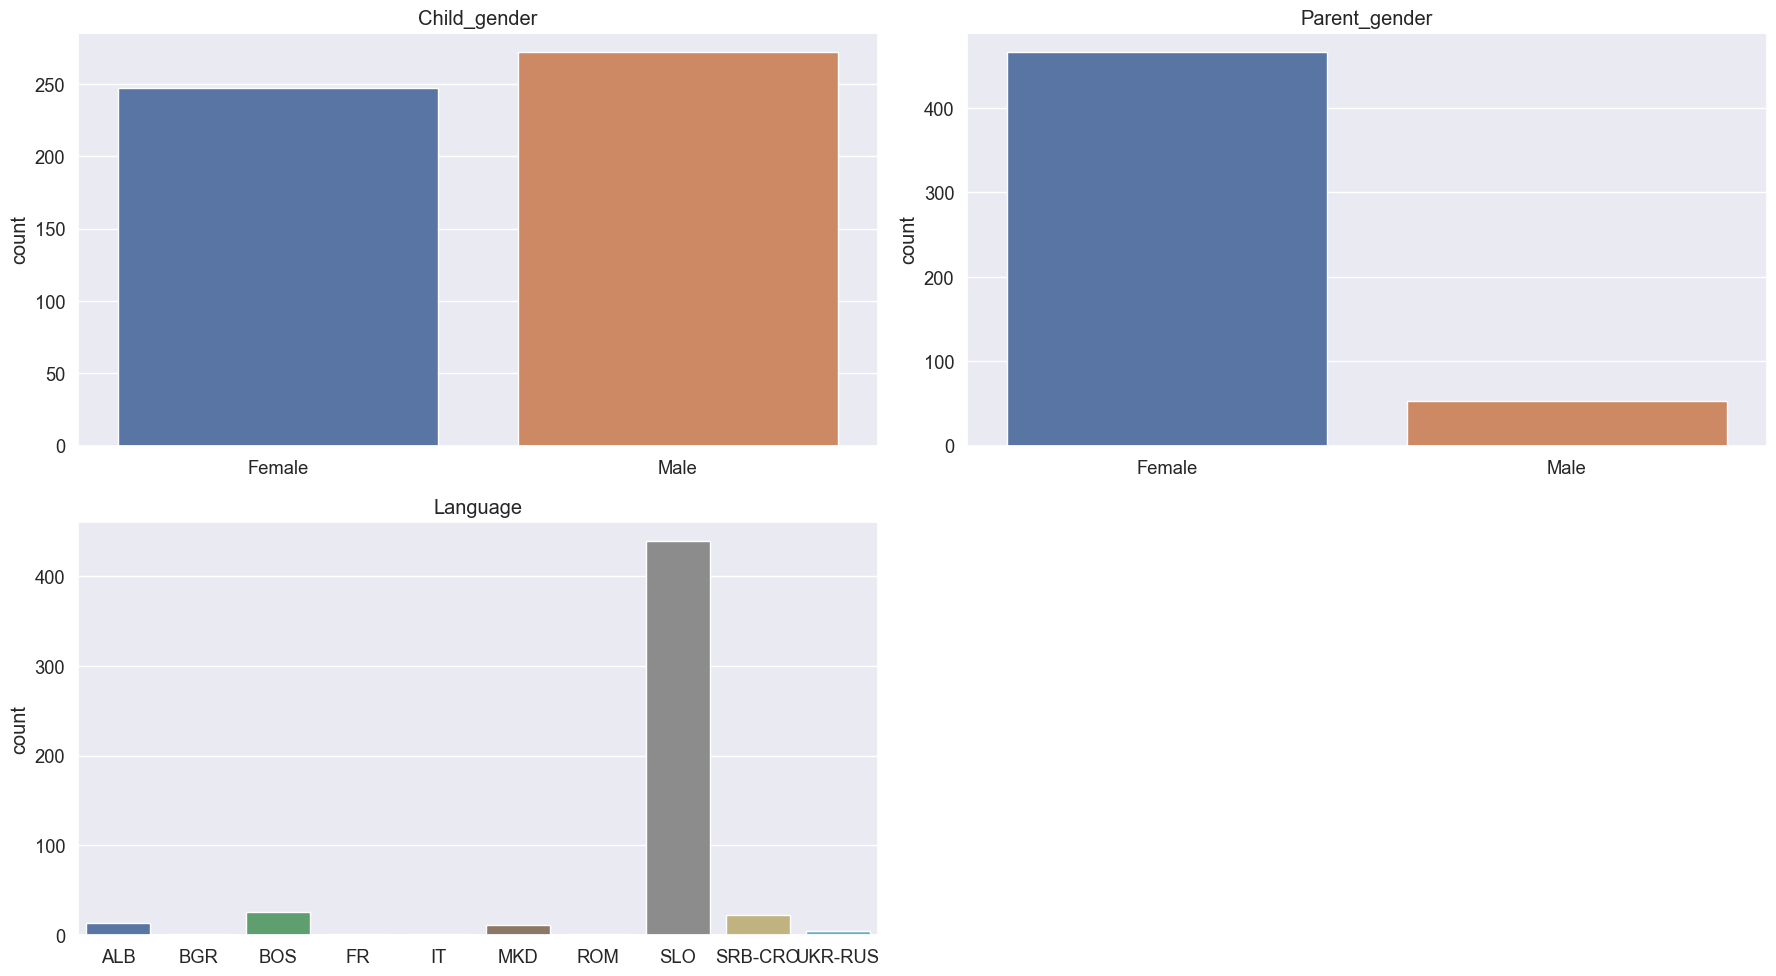

In [50]:
language_mapping = {
    0: "ALB",  # Albanian
    1: 'BGR',  # Bulgarian
    2: 'BOS',  # Bosnian
    3: 'FR',  # French
    4: 'IT',  # Italian
    5: 'MKD',  # Macedonian
    6: 'ROM',  # Romani
    7: 'SLO',  # Slovenian
    8: 'SRB-CRO',  # Serbian-Croatian
    9: 'UKR-RUS'  # Ukrainian-Russian
}
gender_mapping = {0: 'Male', 1: 'Female'}

plt.figure(figsize=(18, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    
    # Replace encoded values with original labels
    if feature == 'Language':
        X[feature] = X[feature].map(language_mapping)
    elif feature == 'Child_gender':
        X[feature] = X[feature].map(gender_mapping)
    elif feature == 'Parent_gender':
        X[feature] = X[feature].map(gender_mapping)
    
    # Get the unique values in the feature column
    unique_values = X[feature].unique()
    # Sort the unique values to ensure they are in the correct order
    unique_values.sort()
    
    # Plot the count plot with the order of categories explicitly specified
    sns.countplot(x=feature, data=X, order=unique_values)
    plt.title(f'{feature}')
    plt.xlabel('')  # Remove the x-axis label
    #plt.xticks(rotation=90)  # Optional: Rotate x-tick labels if they overlap
    
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
delez = pd.read_csv("delez_otrok_vrtci.csv", encoding='utf-8', delimiter=';')
delez.head()

,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,2022/23
0,61.4,63.6,64.7,67.2,70.2,71.9,74.0,75.9,75.6,75.0,76.8,78.1,78.7,80.4,81.7,82.8,82.5,83.7,84.6


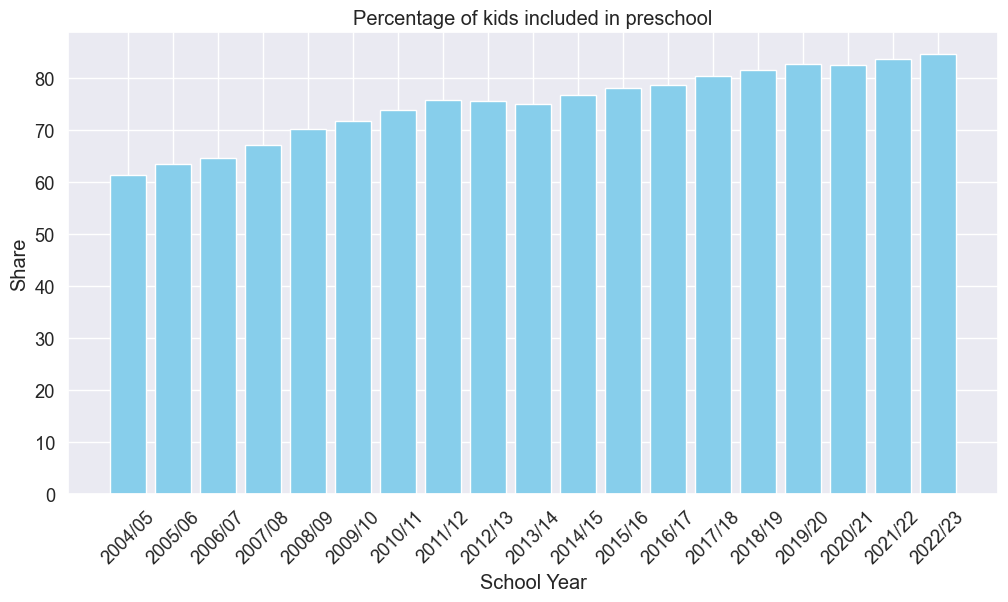

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'delez' is your DataFrame with column names as years and the first row containing values
# First, convert the values to numeric (assuming they are strings)
delez = delez.apply(pd.to_numeric, errors='coerce')

# Get the years (column names) and corresponding values
years = delez.columns.tolist()
values = delez.values.flatten()

# Plot the bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(years, values, color='skyblue')
plt.xlabel('School Year')
plt.ylabel('Share')
plt.title("Percentage of kids included in preschool")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.show()
